In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from math import sqrt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing and Understanding data

In [5]:
# Importing day.csv
day = pd.read_csv(r'C:\Users\Dhruv\Desktop\Upgrad Course\Machine Learning\Linear Regression Assignment\day.csv')

In [6]:
# Looking at the first five rows
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
day.shape

(730, 16)

In [8]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
day['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

## Visualising Data

Text(0, 0.5, 'Count of all Biks Rented')

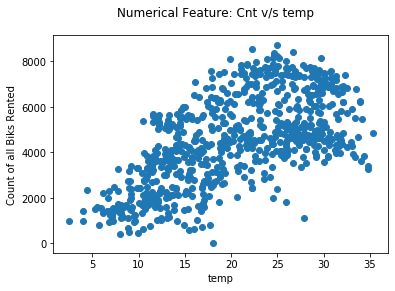

In [11]:
#plotting temp vs count of bikes rented
plt.scatter(day['temp'], day['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

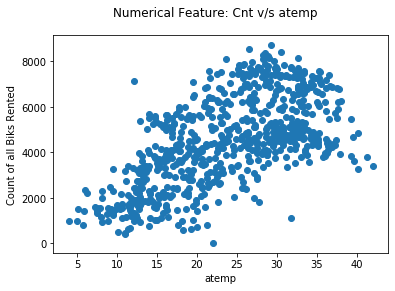

In [12]:
#Plotting atemp vs count of bikes rented
plt.scatter(day['atemp'], day['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

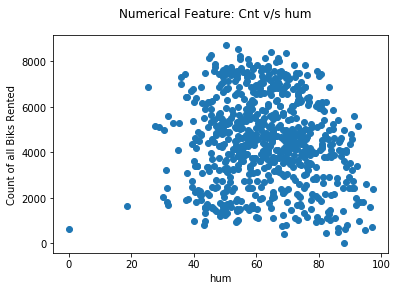

In [13]:
#Plotting hum vs count of bikes rented
plt.scatter(day['hum'], day['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

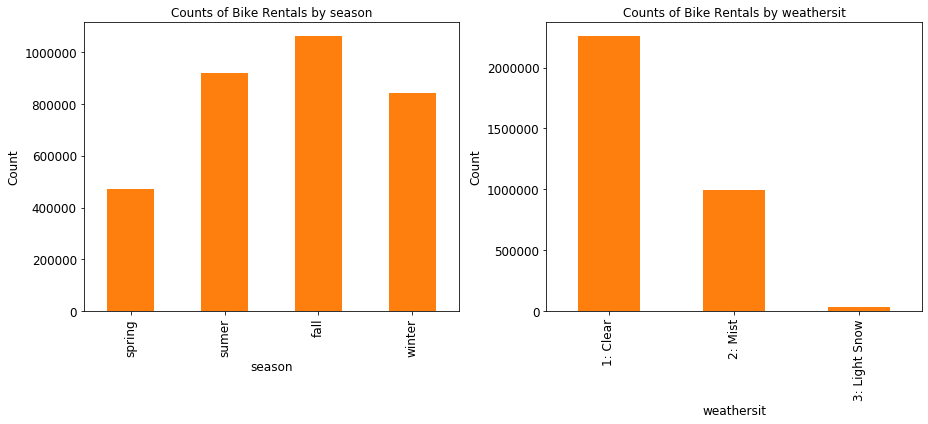

In [14]:
#Plotting season and weathersit vs count of bike rented
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = day[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = day[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

<Figure size 720x504 with 0 Axes>

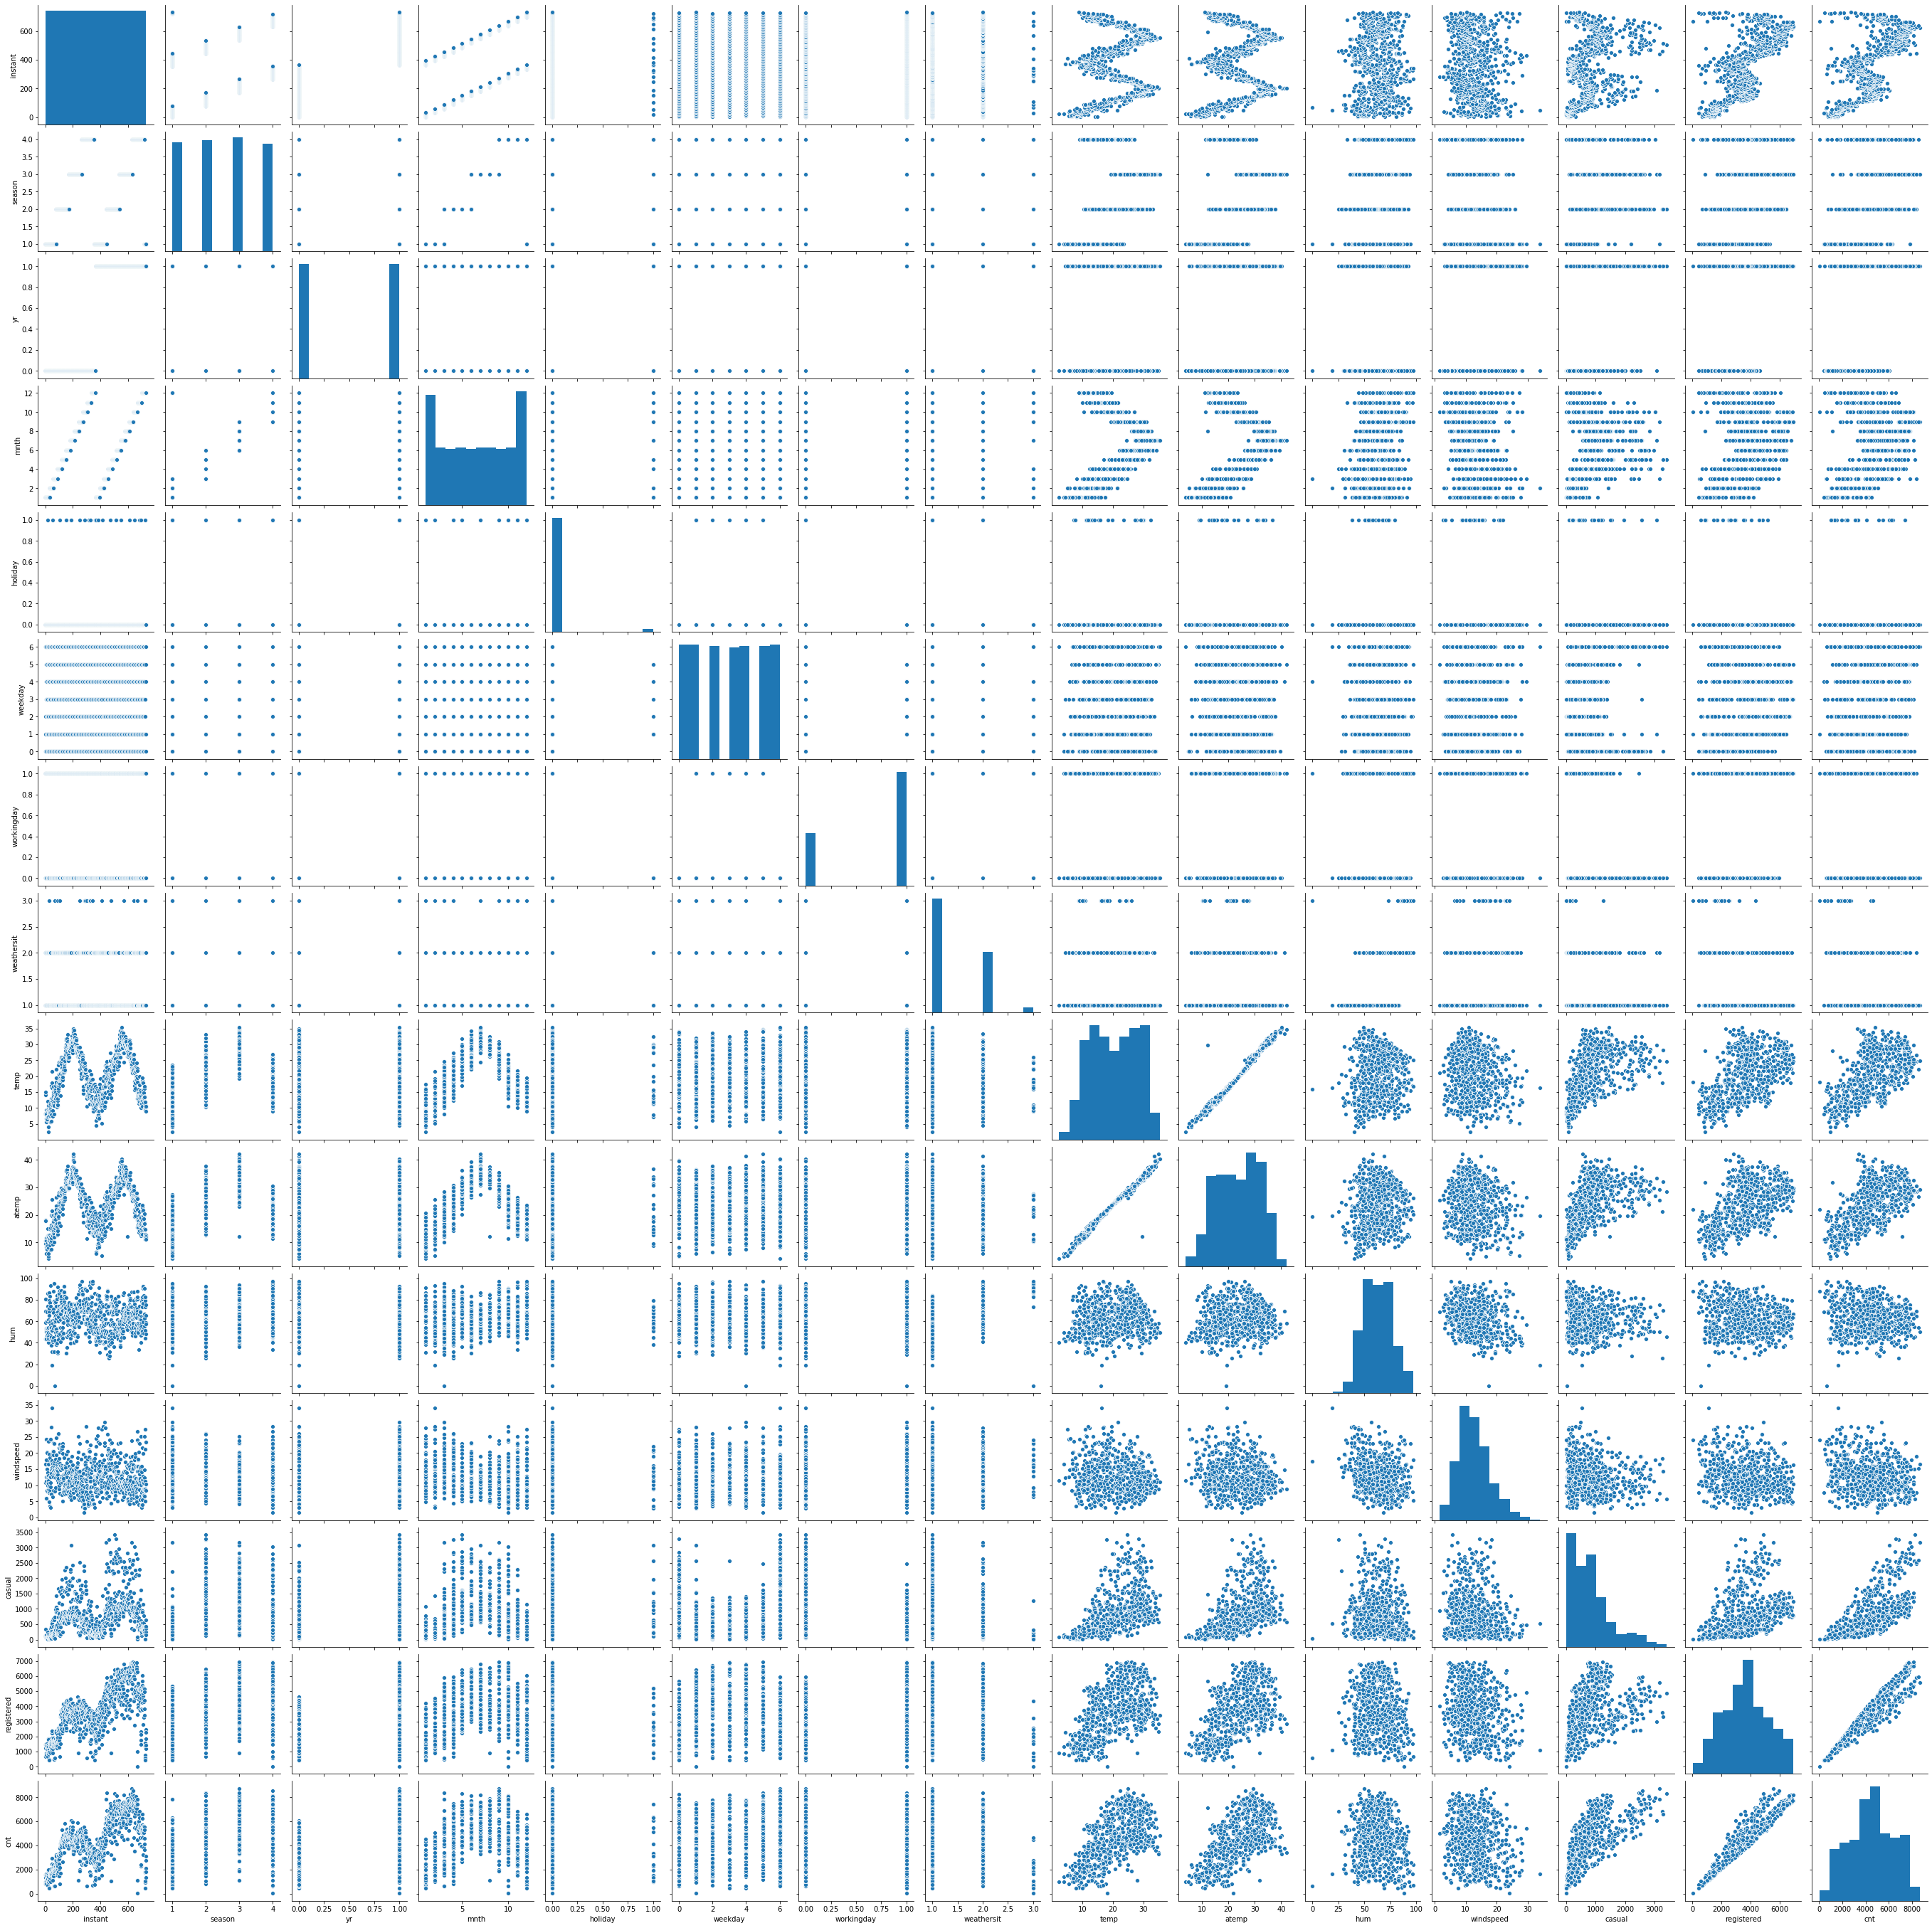

In [15]:
#Visualizing numeric variables 
plt.figure(figsize=(10,7))
sns.pairplot(day)
plt.show()

## Data Preparation

In [16]:
#Maping variables
maping = {"season":{1:"Spring",2:"Summer",3:"Fall",4:"Winter"},
         "mnth":{1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},
         "weekday":{0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"},
         "weathersit":{1:"Clear",2:"Mist",3:"Rain",4:"Heavy Rain"}}
day.replace(maping,inplace=True)


In [17]:
# Creating dummy variables
season_dummy = pd.get_dummies(day['season'],columns=['spring','summer','fall','winter'],drop_first = True)
month_dummy = pd.get_dummies(day['mnth'],drop_first = True)
weekday_dummy = pd.get_dummies(day['weekday'],drop_first = True)
weathersit_dummy = pd.get_dummies(day['weathersit'],drop_first = True)
day = pd.concat([day,season_dummy,month_dummy,weekday_dummy,weathersit_dummy],axis=1)

#Drop the first column from status df using 'drop_first = True'
day.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [18]:
day.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Mist,Rain
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,0,0,1,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,1,0,0,0,1,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [19]:
#dropping unnecessary variables 
day = day.drop(['instant','dteday','temp', 'casual','registered'], axis=1)

## Spilitting data into train and test dataset

In [20]:
#Splitting train and test data
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling Features

In [21]:
#Scaling
scaler = MinMaxScaler()
num_vars = ['atemp','hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Mist,Rain
653,1,0,1,0.501133,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
df_train.describe()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Mist,Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking Correlation

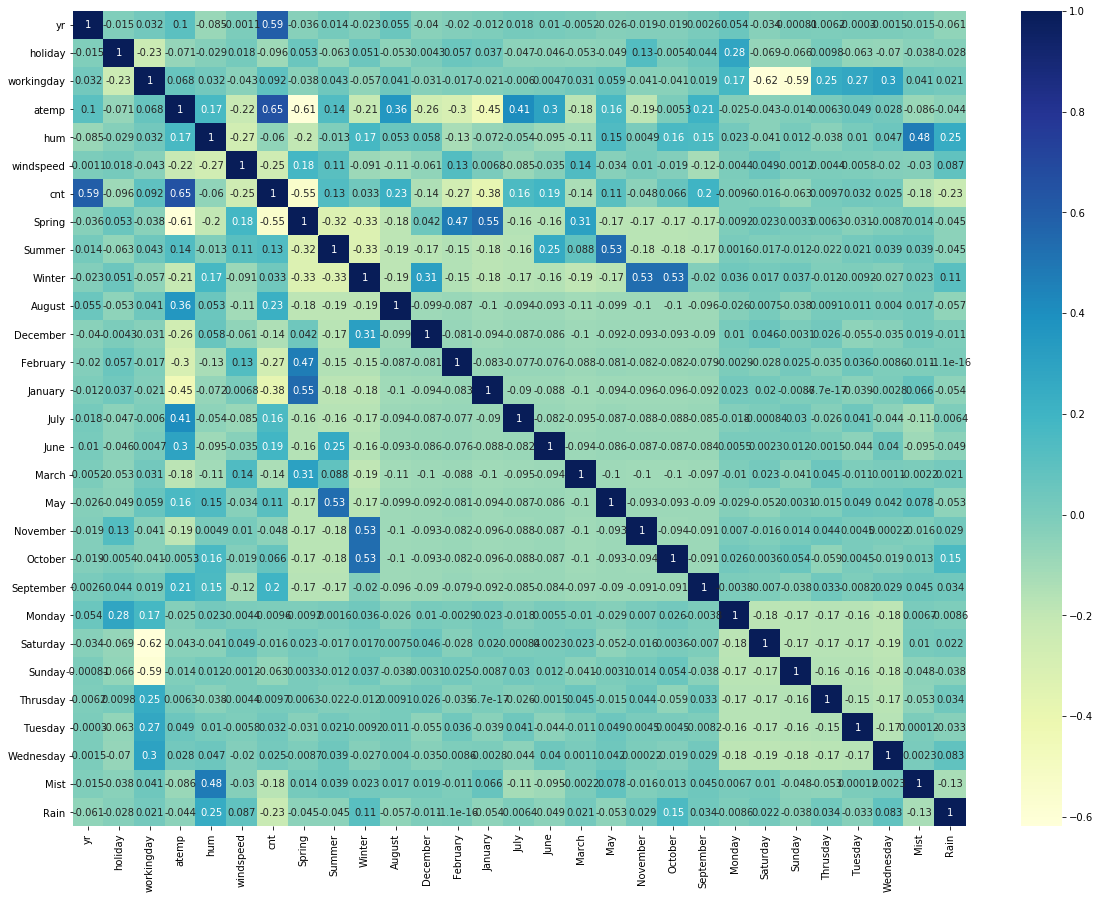

In [23]:
#Correlation
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# MODEL BUILDING:LINEAR REGRESSION

## Dividing train set into X and Y set

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,August,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Mist,Rain
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


### Using Statsmodels for building model and hence adding constant 
- We are adding all independent Variables to X train.
- On basis of P-value and VIF we are eliminating variables one by one
- We are eliminating on basis of:
  1. High p-value,High VIF
  2. High p-value and low VIF
  3.  Low p-value and High VIF
- If p-value is <=0.05 and VIF is <=5 we are not dropping the variables


In [26]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm)

lr_model = lr.fit()

lr_model.params

const         2291.910162
yr            2035.461259
holiday        189.714029
workingday     883.489001
atemp         3646.263951
hum          -1265.601759
windspeed    -1465.321497
Spring        -478.535536
Summer         267.882591
Winter         867.350918
August         320.678344
December      -469.611489
February      -351.939889
January       -638.167195
July          -174.884826
June           154.909821
March           -5.530031
May            311.597364
November      -414.207974
October         67.758627
September      795.065939
Monday        -228.819742
Saturday       847.059845
Sunday         371.647287
Thrusday      -114.743172
Tuesday       -192.579403
Wednesday      -70.508197
Mist          -544.164856
Rain         -2212.555644
dtype: float64

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.12e-180
Time:                        23:37:56   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     482   BIC:                             8378.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2291.9102    304.541      7.526      0.000    1693.518    2890.302
yr          2035.4613     70.341     28.937      0.000    1897.248    2173.675
holiday      189.7140    208.440      0.910      0.363    -219.849     599.277
workingday   883.4890    106.621      8.286      0.000     673.989    1092.989
atemp       3646.2640    394.283      9.248      0.000    2871.539    4420.989
hum        -1265.6018    336.790     -3.758      0.000   -1927.360    -603.843
windspeed  -1465.3215    225.213     -6.506      0.000   -1907.843   -1022.800
Spring      -478.5355    262.011     -1.826      0.068    -993.361      36.290
Summer       267.8826    228.748      1.171      0.242    -181.584     717.349
Winter       867.3509    244.105      3.553      0.000     387.710    1346.992
August       320.6783    290.645      1.103      0.270    -250.410     891.767
December    -469.6115    293.027     -1.603      0.110   -1045.379     106.156
February    -351.9399    286.966     -1.226      0.221    -915.799     211.919
January     -638.1672    291.856     -2.187      0.029   -1211.634     -64.700
July        -174.8848    302.449     -0.578      0.563    -769.167     419.397
June         154.9098    213.371      0.726      0.468    -264.342     574.161
March         -5.5300    214.896     -0.026      0.979    -427.779     416.719
May          311.5974    181.612      1.716      0.087     -45.251     668.446
November    -414.2080    317.933     -1.303      0.193   -1038.915     210.499
October       67.7586    313.536      0.216      0.829    -548.308     683.825
September    795.0659    279.338      2.846      0.005     246.195    1343.937
Monday      -228.8197    134.063     -1.707      0.089    -492.241      34.601
Saturday     847.0598    120.388      7.036      0.000     610.510    1083.609
Sunday       371.6473    122.219      3.041      0.002     131.499     611.795
Thrusday    -114.7432    136.056     -0.843      0.399    -382.078     152.592
Tuesday     -192.5794    135.837     -1.418      0.157    -459.485      74.326
Wednesday    -70.5082    130.528     -0.540      0.589    -326.983     185.966
Mist        -544.1649     91.285     -5.961      0.000    -723.530    -364.799
Rain       -2212.5556    231.298     -9.566      0.000   -2667.032   -1758.079
==============================================================================
Omnibus:                       86.243   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.880
Skew:                          -0.790   Prob(JB):                     8.25e-58
Kurtosis:                       6.142   Cond. No.                     1.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [28]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,83.25
21,Saturday,19.34
22,Sunday,18.01
6,Spring,10.74
8,Winter,9.47
7,Summer,8.23
17,November,6.77
18,October,6.59
9,August,6.24
3,atemp,5.95


### Dropping the variables and updating the model

In [30]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('March', 1,)

In [31]:
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [32]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.96e-181
Time:                        23:38:00   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     483   BIC:                             8372.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2289.1731    285.069      8.030      0.0

In [33]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.85
20,Saturday,16.89
21,Sunday,15.90
6,Spring,9.62
8,Winter,9.14
7,Summer,7.93
3,atemp,5.79
9,August,5.48
13,July,4.94
16,November,4.86


#### Repeat dropping Insignificant and highly correlated variables one by one till we get p-value<=0.05 and VIF<=5 

In [34]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('October', 1,)

In [35]:
# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [36]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.86e-182
Time:                        23:38:04   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     484   BIC:                             8366.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2305.2813    278.432      8.280      0.0

In [37]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,70.07
19,Saturday,16.25
20,Sunday,15.26
6,Spring,9.20
8,Winter,7.15
7,Summer,6.75
3,atemp,5.77
9,August,4.63
13,July,4.24
1,holiday,3.83


In [38]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Wednesday', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.12e-183
Time:                        23:38:06   Log-Likelihood:                -4102.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     485   BIC:                             8360.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2298.1440    277.920      8.269      0.0

In [39]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,68.36
19,Saturday,16.20
20,Sunday,15.22
6,Spring,9.19
8,Winter,7.15
7,Summer,6.74
3,atemp,5.76
9,August,4.63
13,July,4.24
1,holiday,3.78


In [40]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Thrusday', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.61e-184
Time:                        23:38:07   Log-Likelihood:                -4102.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     486   BIC:                             8354.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2285.4644    277.102      8.248      0.0

In [41]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,67.43
19,Saturday,16.20
20,Sunday,15.22
6,Spring,9.19
8,Winter,7.14
7,Summer,6.74
3,atemp,5.76
9,August,4.63
13,July,4.23
1,holiday,3.73


In [42]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('August', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.31e-185
Time:                        23:38:09   Log-Likelihood:                -4103.1
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     487   BIC:                             8350.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2398.7843    260.671      9.202      0.0

In [43]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,59.20
18,Saturday,14.13
19,Sunday,13.48
6,Spring,5.41
3,atemp,5.23
8,Winter,3.59
7,Summer,3.53
1,holiday,3.47
11,January,2.42
4,hum,2.01


In [44]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('June', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.17e-186
Time:                        23:38:10   Log-Likelihood:                -4103.1
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     488   BIC:                             8343.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2395.6278    258.263      9.276      0.0

In [45]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,58.27
17,Saturday,13.92
18,Sunday,13.31
6,Spring,5.38
3,atemp,4.43
8,Winter,3.59
1,holiday,3.42
7,Summer,3.24
11,January,2.36
4,hum,1.98


In [46]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('workingday', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.17e-186
Time:                        23:38:12   Log-Likelihood:                -4103.1
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     488   BIC:                             8343.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3273.9480    317.092     10.325      0.0

In [47]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.55
2,atemp,18.06
5,Spring,5.32
4,windspeed,4.71
7,Winter,3.98
6,Summer,3.29
10,January,2.38
19,Mist,2.34
0,yr,2.10
9,February,1.93


In [48]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('hum', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.92e-184
Time:                        23:38:14   Log-Likelihood:                -4110.8
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     489   BIC:                             8353.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2676.1708    280.596      9.537      0.0

In [49]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.66
3,windspeed,4.69
4,Spring,4.40
6,Winter,3.13
5,Summer,2.87
9,January,2.22
0,yr,2.09
8,February,1.89
12,November,1.82
10,July,1.62


In [50]:
X = X.drop('Saturday', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.97e-185
Time:                        23:38:15   Log-Likelihood:                -4110.9
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     490   BIC:                             8346.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2686.7864    279.003      9.630      0.0

In [51]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.52
3,windspeed,4.66
4,Spring,4.37
6,Winter,3.09
5,Summer,2.85
9,January,2.22
0,yr,2.09
8,February,1.89
12,November,1.82
10,July,1.61


In [52]:
X = X.drop('May', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.27e-185
Time:                        23:38:17   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     491   BIC:                             8342.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2635.7548    275.689      9.561      0.0

In [53]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.42
3,windspeed,4.56
4,Spring,4.36
6,Winter,3.09
5,Summer,2.30
9,January,2.22
0,yr,2.08
8,February,1.89
11,November,1.82
10,July,1.61


In [54]:
X = X.drop('Tuesday', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.75e-186
Time:                        23:38:19   Log-Likelihood:                -4112.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     492   BIC:                             8338.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2614.2935    275.569      9.487      0.0

In [55]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.30
3,windspeed,4.56
4,Spring,4.36
6,Winter,3.07
5,Summer,2.29
9,January,2.22
0,yr,2.08
8,February,1.88
11,November,1.82
10,July,1.61


In [56]:
X = X.drop('Monday', 1,)

# Build a third  model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.45e-187
Time:                        23:38:21   Log-Likelihood:                -4114.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     493   BIC:                             8334.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2582.3782    275.417      9.376      0.0

In [57]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.26
3,windspeed,4.56
4,Spring,4.35
6,Winter,3.05
5,Summer,2.28
9,January,2.21
0,yr,2.07
8,February,1.88
11,November,1.81
10,July,1.61


In [58]:
X = X.drop('February', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.83e-187
Time:                        23:38:24   Log-Likelihood:                -4116.0
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     494   BIC:                             8332.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2463.5543    269.030      9.157      0.0

In [59]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.21
3,windspeed,4.56
6,Winter,3.00
4,Spring,2.91
5,Summer,2.28
0,yr,2.07
10,November,1.80
8,January,1.66
9,July,1.60
13,Mist,1.56


In [60]:
X = X.drop('July', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.12e-187
Time:                        23:38:25   Log-Likelihood:                -4119.6
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     495   BIC:                             8333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2409.1779    269.897      8.926      0.0

In [61]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.54
2,atemp,3.92
6,Winter,2.79
4,Spring,2.77
0,yr,2.07
5,Summer,1.92
9,November,1.80
8,January,1.65
12,Mist,1.56
7,December,1.46


In [62]:
X = X.drop('November', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.50e-186
Time:                        23:38:28   Log-Likelihood:                -4122.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2244.2526    263.314      8.523      0.0

In [63]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.50
2,atemp,3.90
4,Spring,2.76
0,yr,2.07
5,Summer,1.92
6,Winter,1.92
8,January,1.64
11,Mist,1.56
7,December,1.29
9,September,1.23


In [64]:
X = X.drop('December', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.12e-186
Time:                        23:38:30   Log-Likelihood:                -4125.4
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     497   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2109.5557    257.135      8.204      0.0

In [65]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.49
2,atemp,3.90
4,Spring,2.64
0,yr,2.07
5,Summer,1.92
6,Winter,1.66
7,January,1.60
10,Mist,1.56
8,September,1.23
9,Sunday,1.18


In [66]:
X = X.drop('January', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.30e-186
Time:                        23:38:31   Log-Likelihood:                -4128.3
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1954.8287    250.224      7.812      0.0

In [67]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.48
2,atemp,3.88
0,yr,2.06
4,Spring,2.00
5,Summer,1.91
6,Winter,1.66
9,Mist,1.55
7,September,1.23
8,Sunday,1.18
10,Rain,1.08


In [68]:
X = X.drop('Sunday', 1,)

# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.79e-184
Time:                        23:38:33   Log-Likelihood:                -4137.5
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     499   BIC:                             8343.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1893.3620    254.057      7.453      0.0

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.48
2,atemp,3.81
0,yr,2.06
4,Spring,1.98
5,Summer,1.91
6,Winter,1.64
8,Mist,1.54
7,September,1.23
9,Rain,1.08
1,holiday,1.04


## Residual Analysis of train data

In [70]:
y_train_cnt = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

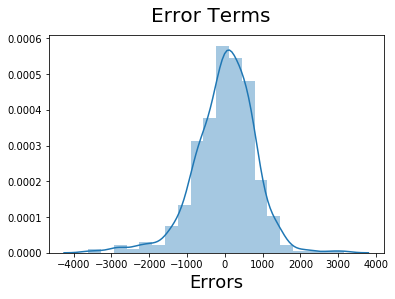

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### From above we can see that errors are normally distributed

## Making predictions using final model in test sets

In [72]:
num_vars = ['atemp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Mist,Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into Xtest abd ytest

In [74]:
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
X_test_m4

,const,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Mist,Rain
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0,0.243430,0.708888,0.287411,1,0,0,...,0,0,0,0,1,0,0,0,1,0
702,1.0,1,0,1,0.511907,0.756118,0.283397,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,1.0,0,0,0,0.577380,0.650923,0.069510,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1.0,1,0,1,0.682653,0.817947,0.052115,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [76]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["July","February","Monday","Tuesday","May","Saturday","hum","workingday","June","August","Thrusday","Wednesday","October","March","Sunday",
"January","December","November"], axis = 1)

In [81]:
# Making predictions

y_pred_m4 = lr_2.predict(X_test_m4)

## Model Evaluation

Text(0, 0.5, 'y_pred')

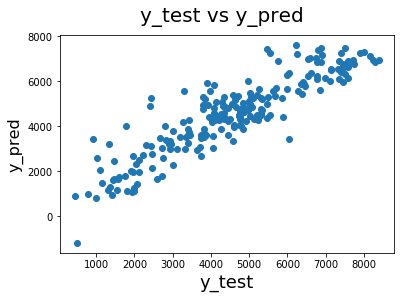

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [79]:
## for train set
from sklearn.metrics import r2_score
y_pred_m4 = lr_2.predict(X_train_lm)


print(r2_score(y_train, y_pred_m4))

0.8286364537748141


In [82]:
## for test set
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_m4))

0.8067952135324659


# Summary
### R-square value of Training set is 82.8%
### R-square value of Testing set is 80.6%
- R square of both training and test data is almost same from which we can conclude that this is a good model